In [16]:
#Preprocessing
import csv
import codecs
import numpy as np
import matplotlib.pyplot as plt
import math

samples=[];
reader=csv.reader(codecs.open('train.csv', "r", encoding="utf-8-sig"), dialect=csv.excel_tab, delimiter=',');
for row in reader:
    samples.append(row);
        
del samples[0]
samples=np.array(samples)
samples=samples.astype(np.float);

tests=[];
reader=csv.reader(codecs.open('test.csv', "r", encoding="utf-8-sig"), dialect=csv.excel_tab, delimiter=',');
for row in reader:
    tests.append(row);
    
del tests[0]
tests=np.array(tests)
tests=tests.astype(np.float);

M=np.max(samples,0)-np.min(samples,0);
m=np.mean(samples,0);
M[-1]=1.0;
m[-1]=0.0;

normal=(samples-m)/M;
tests=(tests-m)/M;

## KNN

In [17]:
def knn_find(to_class, k, train_list, data):
    dists=[];
    for i in train_list:
        diff=(data[i][:12]-to_class[:12]);
        dist=np.sum(diff*diff);
        dists.append([dist, i]);
    dists.sort(key=lambda dist: dist[0]);
    
    mp=[0,0];
    for i in xrange(min(k, len(train_list))):
        mp[data[dists[i][1]][-1]>0.0]+=1;
    return mp[1]>mp[0];

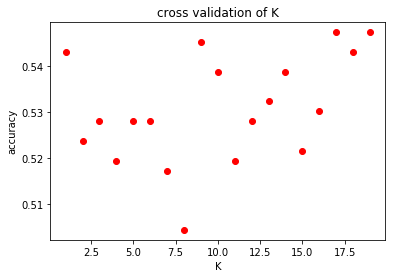

In [19]:
#random shuffle the normalized data to do cross validation
cross_set=np.array(normal);
np.random.shuffle(cross_set)

k_fold=4;
sub_size=len(cross_set)/k_fold;
K=20; # K of KNN
step=1;
ks=[i for i in range(1,K,step)]
rs=[];

for k in ks:
    cr=0.0;
    for i in xrange(k_fold):
        validate_set=[j for j in range(i*sub_size,(i+1)*sub_size)];
        train_set=[j for j in range(len(cross_set)) if j not in validate_set];
        correct=0.0;
        for j in validate_set:
            cl=knn_find(cross_set[j], k, train_set, cross_set)
            if(cl==0 and cross_set[j][-1]==0.0):
                correct+=1;
            if(cl==1 and cross_set[j][-1]>0):
                correct+=1;
        cr+=correct/len(validate_set);
    rs.append(cr/k_fold);
    
plt.plot(ks, rs, 'ro');
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('cross validation of K')
plt.show()

In [23]:
#k=14 is chosen for test
cr=0.0;
for test in tests:
    cl=knn_find(test, 14, [i for i in xrange(len(normal))], normal);
    if(cl==0 and test[-1]==0.0):
        cr+=1;
    if(cl==1 and test[-1]>0):
        cr+=1;

print 'test accuracy:'
print cr/len(tests);

test accuracy:
0.647058823529


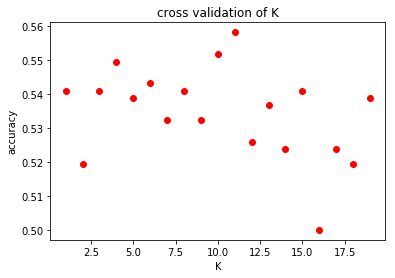

In [24]:
#Hamming distance

def knn_hamming(to_class, k, train_list, data):
    dists=[];
    for i in train_list:
        diff=(data[i][:12]-to_class[:12]);
        dist=np.sum(abs(diff));
        dists.append([dist, i]);
    dists.sort(key=lambda dist: dist[0]);
    
    mp=[0,0];
    for i in xrange(min(k, len(train_list))):
        mp[data[dists[i][1]][-1]>0.0]+=1;
    return mp[1]>mp[0];

cross_set=np.array(normal);  #for separate the samples to 5 subset, drop off the last sample
np.random.shuffle(cross_set)

k_fold=4;
sub_size=len(cross_set)/k_fold;
K=20; # K of KNN
step=1;
ks=[i for i in range(1,K,step)]
rs=[];

for k in ks:
    cr=0.0;
    for i in xrange(k_fold):
        validate_set=[j for j in range(i*sub_size,(i+1)*sub_size)];
        train_set=[j for j in range(len(cross_set)) if j not in validate_set];
        correct=0.0;
        for j in validate_set:
            cl=knn_hamming(cross_set[j], k, train_set, cross_set)
            if(cl==0 and cross_set[j][-1]==0.0):
                correct+=1;
            if(cl==1 and cross_set[j][-1]>0):
                correct+=1;
        cr+=correct/len(validate_set);
    rs.append(cr/k_fold);
    

plt.plot(ks, rs, 'ro');
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('cross validation of K')
plt.show()

In [26]:
#k=11 is chosen for test
cr=0.0;
for test in tests:
    cl=knn_hamming(test, 11, [i for i in xrange(len(normal))], normal);
    if(cl==0 and test[-1]==0.0):
        cr+=1;
    if(cl==1 and test[-1]>0):
        cr+=1;

print 'test accuracy:'
print cr/len(tests);

test accuracy:
0.627450980392


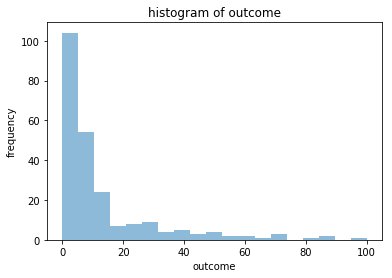

In [27]:
#Histgram of outcome

bins = np.linspace(0, 100, 20)
plt.hist([i[-1] for i in normal if i[-1]!=0.0], bins, alpha=0.5)
plt.xlabel('outcome')
plt.ylabel('frequency')
plt.title('histogram of outcome')
plt.show()

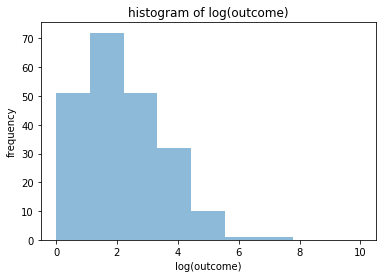

In [28]:
#Histgram of log(outcome)
import math

bins = np.linspace(0, 10, 10)
plt.hist([math.log(i[-1]) for i in normal if i[-1]!=0.0], bins, alpha=0.5)
plt.xlabel('log(outcome)')
plt.ylabel('frequency')
plt.title('histogram of log(outcome)')
plt.show()

## Linear Regression

According to the lecture, w=(X'X)(-1)X'y

In [29]:
#use log(y) to do regression

from numpy.linalg import inv

X=[i[:12] for i in normal if i[-1]>0];
y=[math.log(i[12]) for i in normal if i[-1]>0];
XT=np.transpose(X);

t=np.dot(inv(np.dot(XT, X)),XT);
w=np.dot(t, y);

test_x=tests[:, 0:12];
test_y=tests[:, 12];

cal_y=np.exp(np.dot(test_x, w));

diff=(cal_y-test_y);
RSS=np.sum(diff*diff);

print "RSS:", RSS

RSS: 117890.789658


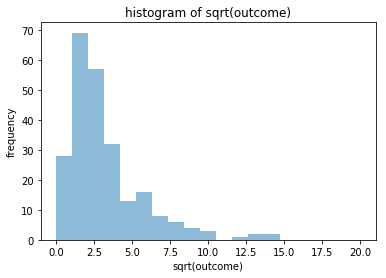

In [30]:
#Histgram of sqrt(outcome)
import math

bins = np.linspace(0, 20, 20)
plt.hist([math.pow(i[12],0.5) for i in normal if i[-1]!=0.0], bins, alpha=0.5)
plt.xlabel('sqrt(outcome)')
plt.ylabel('frequency')
plt.title('histogram of sqrt(outcome)')
plt.show()

In [31]:
#use sqrt(y) to do regression

from numpy.linalg import inv

X=[i[:12] for i in normal if i[-1]>0];
y=[math.pow(i[12],0.5) for i in normal if i[12]>0]
XT=np.transpose(X);

t=np.dot(inv(np.dot(XT, X)),XT);
w=np.dot(t, y);

test_x=tests[:, 0:12];
test_y=tests[:, 12];

cal_y=np.dot(test_x, w);
cal_y*=cal_y;

diff=(cal_y-test_y);
RSS=np.sum(diff*diff);

print "RSS:", RSS

RSS: 119416.311918
